>** Data Analysis** 

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import seaborn as sns
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

['heart.csv']


In [22]:
# read the data
heart_data = pd.read_csv('../input/heart.csv', sep=',')

In [23]:
# view all column names and few rows of data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


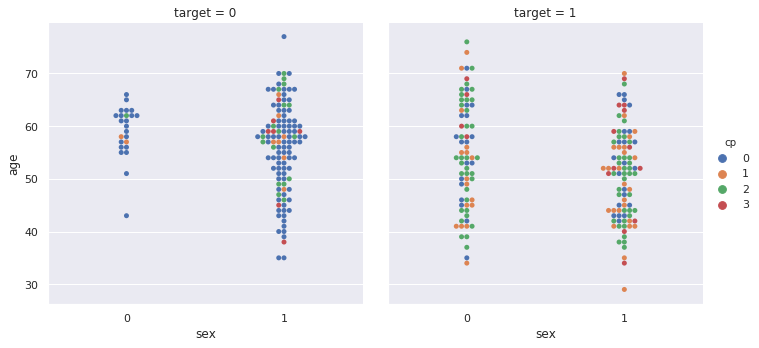

In [24]:
sns.set()
# people with heart attack based on sex,age,cp
sns.catplot(x="sex", y="age",col="target",hue="cp", kind="swarm",data=heart_data)

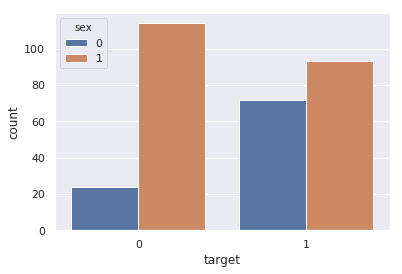

In [25]:
# comparison of people with heart attack on basis of sex
sns.countplot(x="target", hue="sex",data=heart_data)
plt.show()

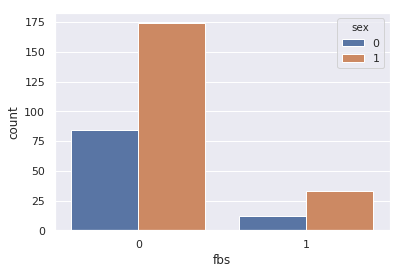

In [26]:
# comparison of fbs on basis of sex
sns.countplot(x="fbs", hue="sex",data=heart_data)
plt.show()

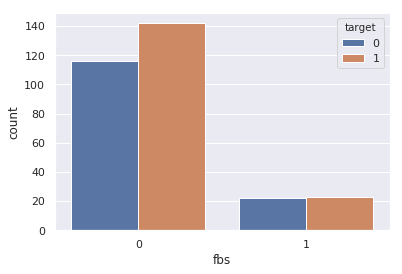

In [27]:
# comparison of fbs on basis of people who had a heart attack
sns.countplot(x="fbs", hue="target",data=heart_data)
plt.show()

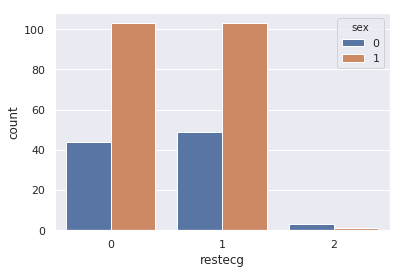

In [28]:
# comparison of restecg on basis of sex
sns.countplot(x="restecg", hue="sex",data=heart_data)
plt.show()

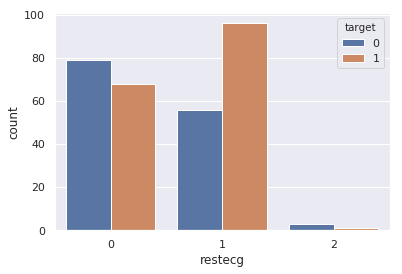

In [29]:
# comparison of restecg on basis of people who had a heart attack
sns.countplot(x="restecg", hue="target",data=heart_data)
plt.show()

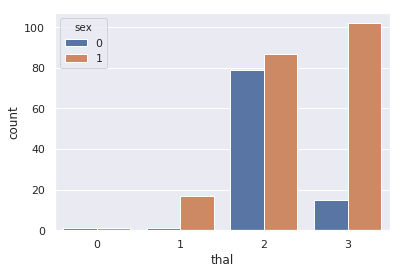

In [30]:
# comparison of thal on basis of sex
sns.countplot(x="thal", hue="sex",data=heart_data)
plt.show()

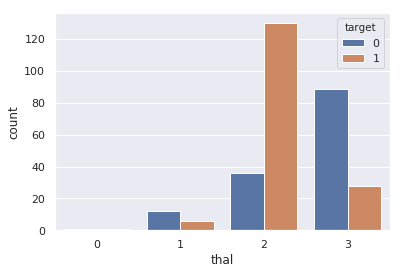

In [31]:
# comparison of thal on basis of people who had a heart attack
sns.countplot(x="thal", hue="target",data=heart_data)
plt.show()

> **Data Preparation**

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

y = heart_data.target.values
X = heart_data.drop(['target'], axis = 1)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2,random_state=0)


> **Building Model**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# Define the model. Set random_state to 1
heart_model = RandomForestClassifier(n_estimators = 1000, random_state=1)




> **Training Model**

In [34]:
# fit your model
heart_model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

> **Getting Predictions and Evaluating Model**

In [35]:
val_predictions = heart_model.predict(val_X)
# Calculate the mean absolute error of your Random Forest model on the validation data
heart_val_mae = mean_absolute_error(val_predictions, val_y)
acc = accuracy_score(val_y, val_predictions)

print("Validation MAE for Random Forest Model: {}".format(heart_val_mae))
print("Validation Accuracy for Random Forest Model: {}".format(acc))

print("\nPredicted Values:")
print(val_predictions)
print("\nActual Values:")
print(val_y)

Validation MAE for Random Forest Model: 0.14754098360655737
Validation Accuracy for Random Forest Model: 0.8524590163934426

Predicted Values:
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]

Actual Values:
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]
